In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import warnings

import seaborn as sns

In [2]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [3]:
warnings.filterwarnings('ignore')

---
### 데이터 불러오기

In [5]:
election = pd.read_csv('../Data/election_2022.csv')

In [9]:
# 기본 통계량 확인하기
election.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   광역시도    248 non-null    object
 1   시군구     248 non-null    object
 2   선거인수    248 non-null    int64 
 3   투표수     248 non-null    int64 
 4   이재명     248 non-null    int64 
 5   윤석열     248 non-null    int64 
 6   심상정     248 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 13.7+ KB
None


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
count,248,248,248.000000,248.000000,248.000000,248.000000,248.000000
unique,17,226,NaN,NaN,NaN,NaN,NaN
top,경기도,중구,NaN,NaN,NaN,NaN,NaN
freq,41,6,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,176570.540323,136147.838710,64479.104839,65566.290323,3215.532258
std,NaN,NaN,141049.731983,108569.706317,56875.864428,56766.365763,2893.695797
min,NaN,NaN,8141.000000,6653.000000,1590.000000,2052.000000,109.000000
25%,NaN,NaN,47671.500000,39215.750000,17363.000000,18223.000000,709.000000
50%,NaN,NaN,154353.500000,114654.000000,48797.000000,50341.000000,2617.500000
75%,NaN,NaN,265099.250000,204189.250000,99830.750000,101949.750000,5041.000000


In [10]:
# dimension 확인
election.shape

(248, 7)

In [11]:
# 컬럼명 확인하기
election.columns

Index(['광역시도', '시군구', '선거인수', '투표수', '이재명', '윤석열', '심상정'], dtype='object')

In [12]:
# 컬렴별 자료 타입 확인하기
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   광역시도    248 non-null    object
 1   시군구     248 non-null    object
 2   선거인수    248 non-null    int64 
 3   투표수     248 non-null    int64 
 4   이재명     248 non-null    int64 
 5   윤석열     248 non-null    int64 
 6   심상정     248 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 13.7+ KB


In [20]:
# NaN 값 확인
election.isnull().any()

광역시도    False
시군구     False
선거인수    False
투표수     False
이재명     False
윤석열     False
심상정     False
dtype: bool

In [25]:
# election에 electionSum이라는 컬럼 생성 : 윤석열 + 이재명 + 심상정
election['electionSum']=election.iloc[:,4:7].apply(sum,axis=1)
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417
1,서울특별시,중구,111448,84998,38244,42906,2310,83460
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727


In [27]:
# electionSum이 투표수의 몇 퍼센트?
election['electionRatio'] = round(election.electionSum / election.투표수 *  100,2)
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99


In [29]:
# 추가한 column들을 가진 dataFrame 다시 저장하기
election.to_csv('../Data/election+sum+ratio.csv',index=False)

In [64]:
si_do_ratio=election.groupby('광역시도').sum()

# 위에랑 똑같은 거
election.pivot_table(index='광역시도',values='투표수',aggfunc=np.sum)

,투표수
광역시도,
강원도,1015458
경기도,8518854
경상남도,2146882
경상북도,1774284
광주광역시,985492
대구광역시,1611512
대전광역시,945308
부산광역시,2200224
서울특별시,6501831


In [65]:
si_do_ratio=si_do_ratio.sort_values(by='투표수')[::-1]

,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
광역시도,,,,,,,
경기도,11106036,8518854,4297931,3859666,201113,8358710,4018.96
서울특별시,8346647,6501831,2944981,3255747,180324,6381052,2453.06
부산광역시,2921510,2200224,831896,1270072,47541,2149509,1562.69
경상남도,2809907,2146882,794130,1237346,52591,2084067,2132.21
인천광역시,2519225,1883504,913320,878560,51852,1843732,976.71
경상북도,2273028,1774284,418371,1278922,33123,1730416,2339.40
대구광역시,2046714,1611512,345045,1199888,31131,1576064,781.81
충청남도,1796474,1324660,589991,670283,31789,1292063,1560.70
전라남도,1581278,1282168,1094872,145549,16279,1256700,2152.66


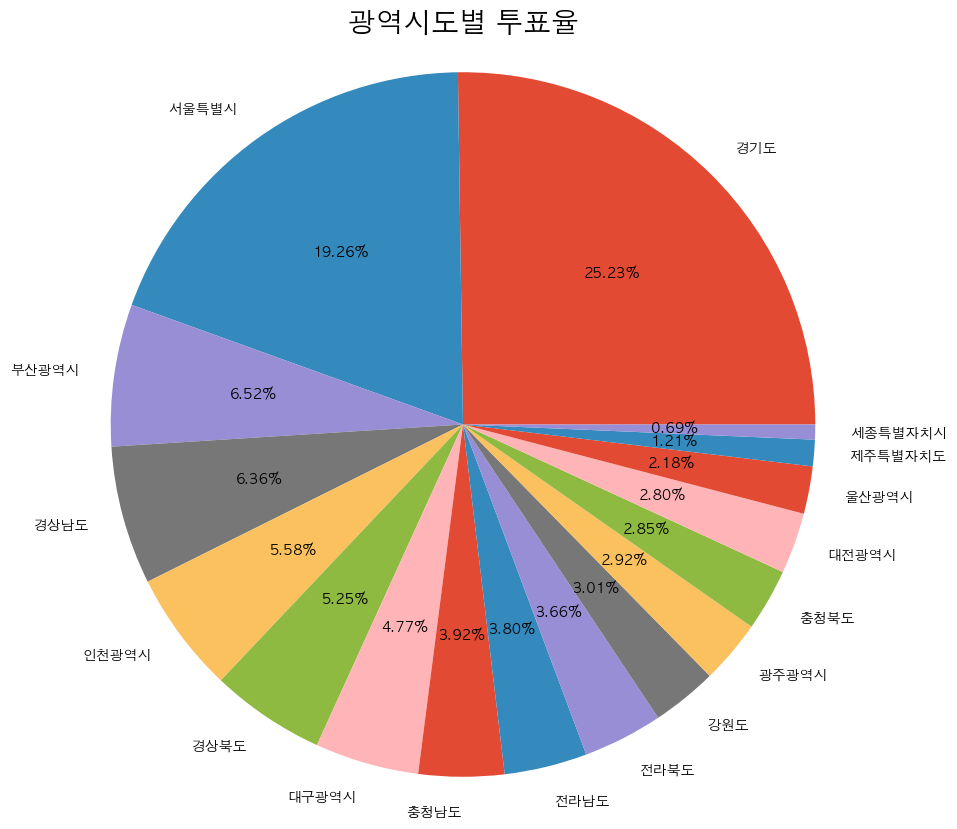

In [74]:
plt.style.use('ggplot')

si_do_ratio['투표수'].plot(
    kind='pie',
    figsize=(10,10),
    autopct='%.2f%%' # 소수 두째짜리까지 나타내고 %를 붙인다.
)

plt.title('광역시도별 투표율',size = 20)
plt.axis('equal')
plt.rcParams['font.size'] = 10
plt.ylabel('')

plt.show()

---
### 윤석열 후보의 광역시도별 득표율을 pie chart로 표현하기

In [90]:
yoon = election.pivot_table(index='광역시도',values='윤석열',aggfunc=np.sum)
yoon.sort_values(by='윤석열',ascending=False,inplace=True)

lee = election.pivot_table(index='광역시도',values='이재명',aggfunc=np.sum)
lee.sort_values(by='이재명',ascending=False,inplace=True)

sim = election.pivot_table(index='광역시도',values='심상정',aggfunc=np.sum)
sim.sort_values(by='심상정',ascending=False,inplace=True)

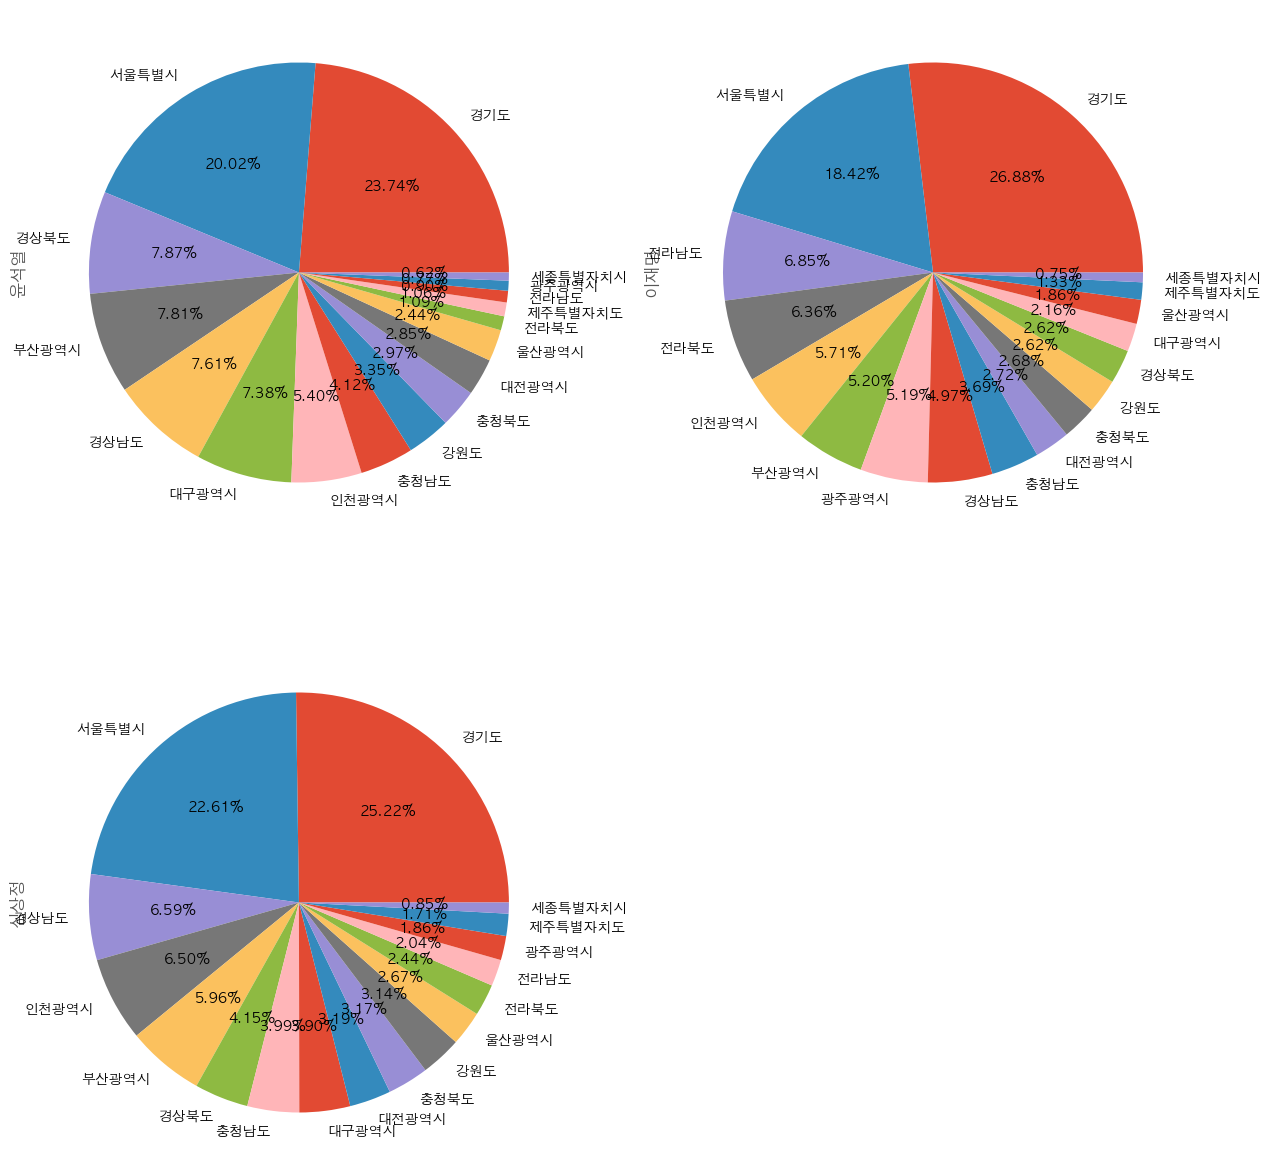

In [94]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

yoon['윤석열'].plot(
    kind='pie',
    autopct='%.2f%%', # 소수 두째짜리까지 나타내고 %를 붙인다.
    ax=ax1
)

lee['이재명'].plot(
    kind='pie',
    autopct='%.2f%%', # 소수 두째짜리까지 나타내고 %를 붙인다.
    ax=ax2
)


sim['심상정'].plot(
    kind='pie',
    autopct='%.2f%%', # 소수 두째짜리까지 나타내고 %를 붙인다.
    ax=ax3
)


plt.show()

---
### 윤석열 후보의 서울 득표 Top5

In [103]:
election_seoul=election[election.광역시도 == '서울특별시']
election_seoul.set_index('시군구',inplace=True)

In [110]:
yoon_seoul=election_seoul.sort_values(by='윤석열',ascending=False)

In [136]:
s1 = yoon_seoul.head()['윤석열']
s2 =pd.Series(yoon_seoul.iloc[5:,:].sum(axis=0)['윤석열'],index=['기타'])
s3 =pd.concat([s1,s2],axis=0)

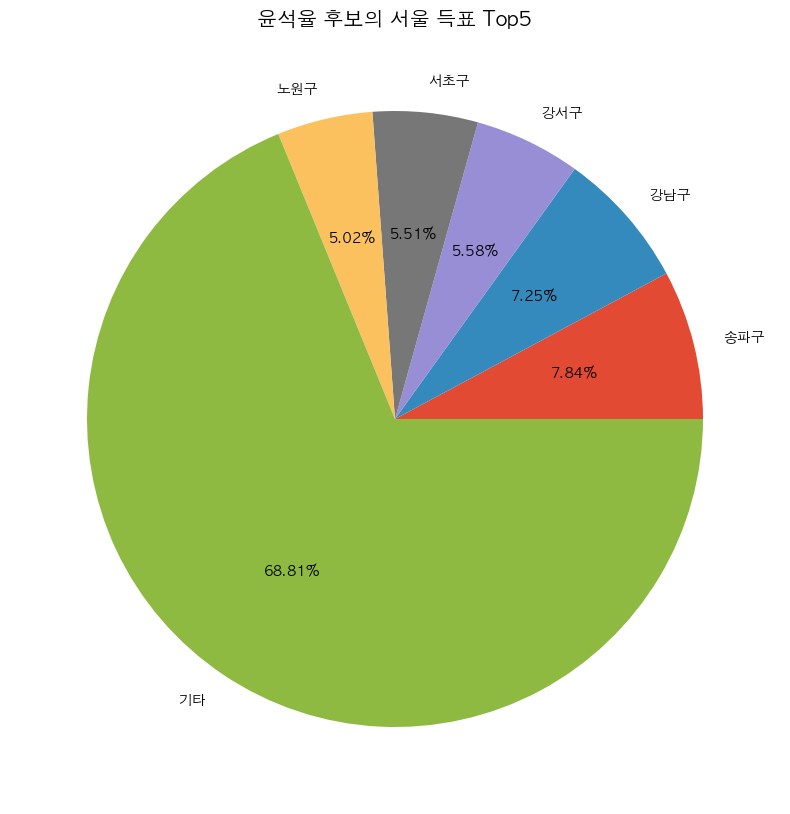

In [137]:
plt.style.use('ggplot')

s3.plot(
    kind='pie',
    autopct='%.2f%%',
    figsize=(12,10)
)

plt.title('윤석율 후보의 서울 득표 Top5')

plt.show()

---
### 성북구 투표율 보기

In [144]:
sung=election[election.시군구 == '성북구']

In [147]:
sung['기타'] = sung.투표수 - sung.electionSum
sung

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio,기타
7,서울특별시,성북구,375880,292187,142702,135044,8952,286698,98.12,5489


In [154]:
sung_vote=sung[['윤석열','이재명','심상정','기타']].T

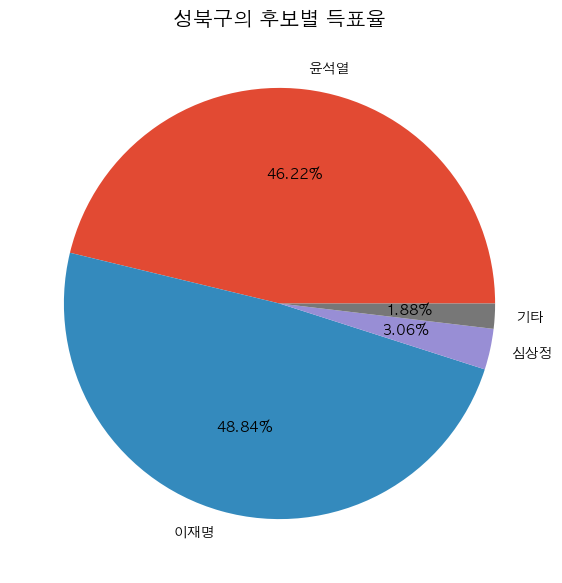

In [160]:
plt.style.use('ggplot')

sung_vote[7].plot(
    kind='pie',
    autopct='%.2f%%',
    figsize=(7,7)
)

plt.title('성북구의 후보별 득표율')
plt.ylabel('')

plt.show()

---
### 투표수가 가장 많은 4지역의 후보별 득표수 차이

In [188]:
vote_4=election.pivot_table(index='광역시도',aggfunc=sum)

In [191]:
vote_4.sort_values(by='투표수',ascending=False,inplace=True)

In [192]:
vote_4=vote_4[['윤석열','이재명','심상정']].head(4)

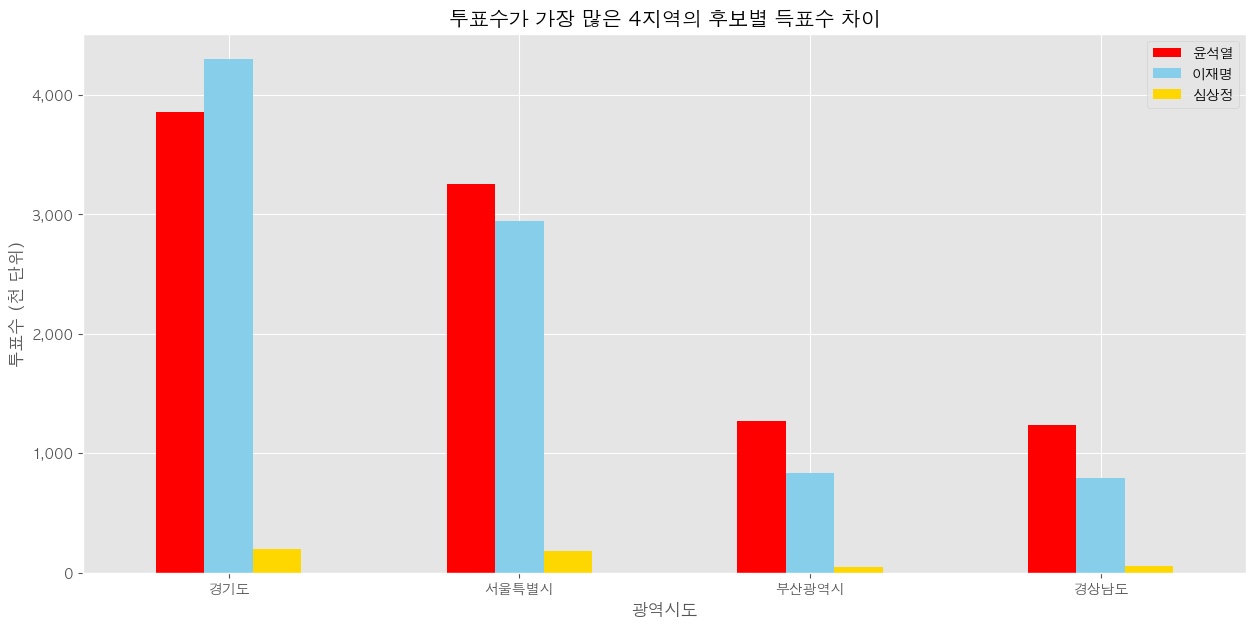

In [209]:
plt.style.use('ggplot')

vote_4.plot(
    kind='bar',
    figsize=(15,7),
    color=['red','#87CEEB','gold']
)

# x축 회전
plt.xticks(rotation=0,size=10)
# y축 회전
plt.yticks(rotation=0)

plt.ylabel('투표수 (천 단위)')

# 1000 단위로 끊기
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values / 1000])

plt.title('투표수가 가장 많은 4지역의 후보별 득표수 차이')

plt.show()

---
### 투표수가 높은 시군구의 후보별 득표수

In [225]:
vote_si_gu=election.sort_values(by='투표수',ascending=False)


In [226]:
vote_si_gu['시군']=vote_si_gu.광역시도 + " " + vote_si_gu.시군구
vote_si_gu.set_index('시군',inplace=True)

In [227]:
vote_si_gu=vote_si_gu[['윤석열','이재명','심상정']].head(5)

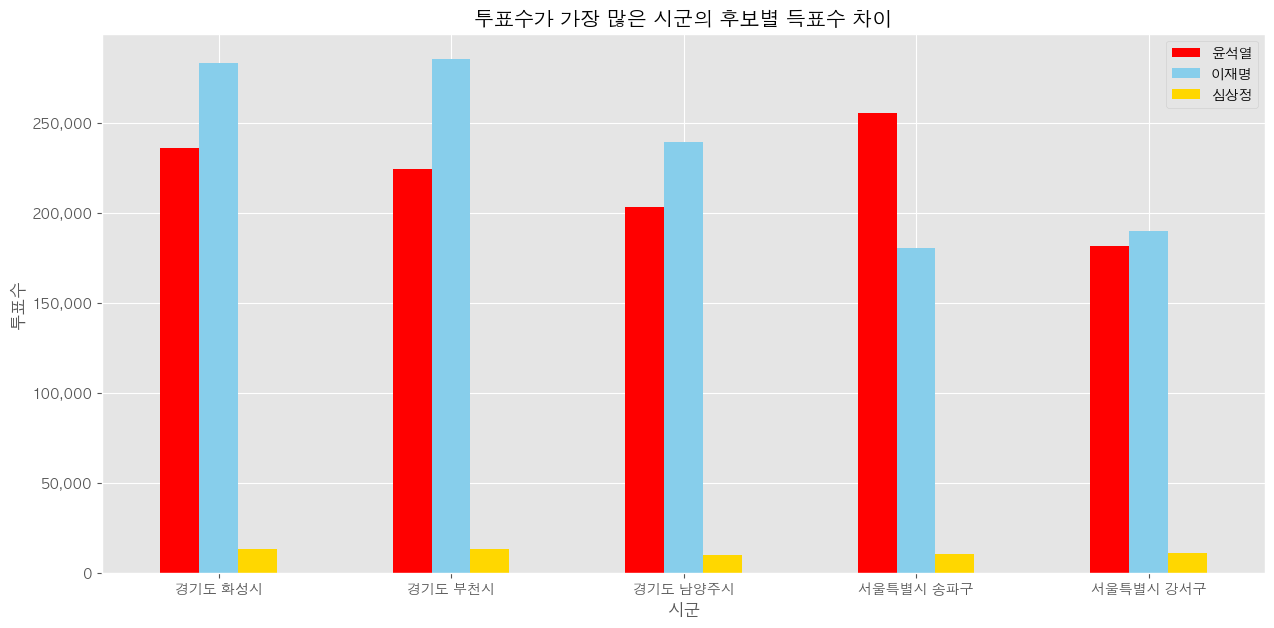

In [228]:
plt.style.use('ggplot')

vote_si_gu.plot(
    kind='bar',
    figsize=(15,7),
    color=['red','#87CEEB','gold']
)

# x축 회전
plt.xticks(rotation=0,size=10)
# y축 회전
plt.yticks(rotation=0)

plt.ylabel('투표수')

# 1000 단위로 끊기
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.title('투표수가 가장 많은 시군의 후보별 득표수 차이')

plt.show()